In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('seeds_dataset.txt', sep= '\t', header=None,
                 names=['area', 'perimeter', 'compactness', 'lengthOfKernel',
                        'widthOfKernel', 'asymmetryCoefficient', 'lengthOfKernelGroove', 'seedType'])

X = df.drop(columns=['seedType']).values
y = df['seedType'].values

In [11]:
# Splitting into training and testing sets manually (80-20 split)
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))
X_train, X_test = X[indices[:split]], X[indices[split:]]
y_train, y_test = y[indices[:split]], y[indices[split:]]

# Calculate class priors (P(Y))
classes, counts = np.unique(y_train, return_counts=True)
priors = {cls: count / len(y_train) for cls, count in zip(classes, counts)}

# Calculate mean and variance for each feature per class
means = {cls: X_train[y_train == cls].mean(axis=0) for cls in classes}
variances = {cls: X_train[y_train == cls].var(axis=0) for cls in classes}

# Gaussian likelihood function
def gaussian_probability(x, mean, variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean) ** 2) / (2 * variance))



In [12]:

def predict(X):
    predictions = []
    for x in X:
        posteriors = {}
        for cls in classes:
            likelihood = np.prod(gaussian_probability(x, means[cls], variances[cls]))
            posteriors[cls] = likelihood * priors[cls]  # P(X|Y) * P(Y)
        predictions.append(max(posteriors, key=posteriors.get))  # Class with highest probability
    return np.array(predictions)

y_pred = predict(X_test)

# Calculate Accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9762


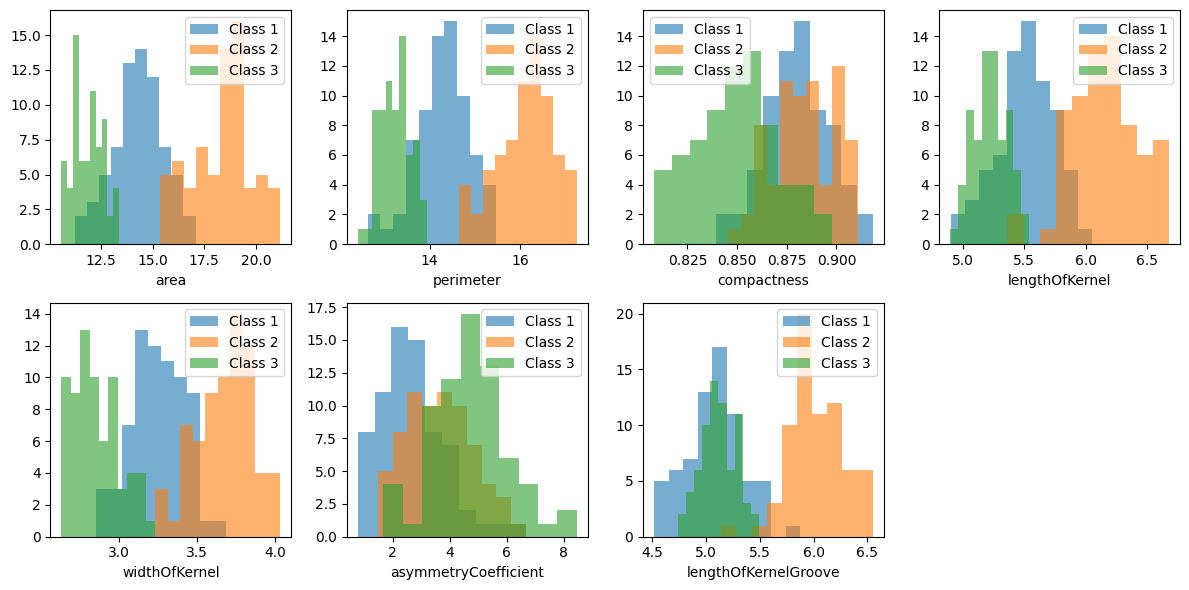

In [13]:

# Plot feature distributions per class
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i+1)
    for cls in classes:
        plt.hist(df[df['seedType'] == cls][feature], bins=10, alpha=0.6, label=f'Class {cls}')
    plt.xlabel(feature)
    plt.legend()
plt.tight_layout()
plt.show()
